## EE 461P: Data Science Principles  
### Assignment 5
### Total points: 90
### Due: Tuesday, April 26, 2022, submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):
1. Jared McArthur jtm4343
2. 

### Homework group No.: 

# Problem 1 : Classification using Decision Trees and Logistic Regression [20 points]

## (TA : Syamantak)

## [ Note : For the people who had attempted this problem as part of the last homework, there are a few changes, so please take another look ]

In this problem, we will be trying out a simple classification problem using two different classifiers - Decision Trees and Logistic Regression, and compare their performance. Download the data for the problem [here](https://drive.google.com/file/d/1Pwm3C3UzU37VmL1anRDvwe4NX21tzFyv/view?usp=sharing). The dataset consists of 4601 data points, each having 57 features, containing information about emails. Each email has a label of spam(1)/not-spam(0). You can read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/spambase). 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics

data = pd.read_csv('spambase.data')

a) [1 point] Print out the head of the dataframe using the [pandas.DataFrame.head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) function.

In [4]:
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f49,f50,f51,f52,f53,f54,f55,f56,f57,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


b) [2 points] Split the dataset into training and test using a 80-20 split.

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns = ['label']), data[['label']],test_size = 0.2, random_state = 42)

## [6 points] Decision Trees

Use the example provided [here](https://scikit-learn.org/stable/modules/tree.html) to get an idea of how to use sklearn's decision tree classifier.

[1 points] a) Train a decision tree model on the training dataset.

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

[2 points] b) Plot the decision tree learned in the previous question. Use the [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) function.

[Text(0.8474356978411836, 0.9814814814814815, 'X[52] <= 0.056\ngini = 0.474\nsamples = 3680\nvalue = [2257, 1423]'),
 Text(0.7288810575181159, 0.9444444444444444, 'X[6] <= 0.065\ngini = 0.35\nsamples = 2779\nvalue = [2150, 629]'),
 Text(0.5822065594806763, 0.9074074074074074, 'X[51] <= 0.251\ngini = 0.265\nsamples = 2523\nvalue = [2127, 396]'),
 Text(0.4540749547101449, 0.8703703703703703, 'X[15] <= 0.04\ngini = 0.155\nsamples = 2101\nvalue = [1923, 178]'),
 Text(0.3709518417874396, 0.8333333333333334, 'X[23] <= 0.02\ngini = 0.109\nsamples = 1882\nvalue = [1773, 109]'),
 Text(0.3339809782608696, 0.7962962962962963, 'X[54] <= 20.714\ngini = 0.096\nsamples = 1844\nvalue = [1751, 93]'),
 Text(0.29714070048309177, 0.7592592592592593, 'X[24] <= 0.015\ngini = 0.092\nsamples = 1839\nvalue = [1750, 89]'),
 Text(0.2420108695652174, 0.7222222222222222, 'X[55] <= 10.5\ngini = 0.137\nsamples = 1162\nvalue = [1076, 86]'),
 Text(0.18121980676328503, 0.6851851851851852, 'X[7] <= 0.25\ngini = 0.074\ns

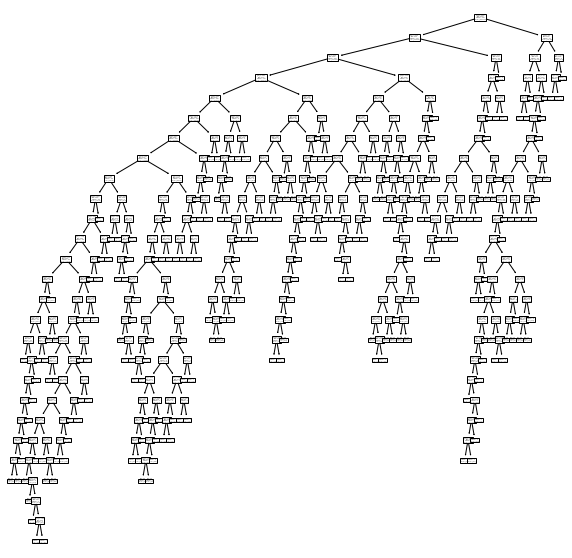

In [16]:
import matplotlib.pyplot as plt
import sklearn
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(dtree)

[3 points] For this part, make predictions on the test data using the trained model, and compute the classification Accuracy, AUC score and plot the ROC curves.

Helpful resources can be found here - 
1. [sklearn.tree.DecisionTreeClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
2. [sklearn.metrics.plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)

In [17]:
pred = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

train_preds = dtree.predict_proba(X_train)
test_preds = dtree.predict_proba(X_test)

train_score = roc_auc_score(Y_train, train_preds[:,1])
test_score = roc_auc_score(Y_test, test_preds[:,1])

print(classification_report(Y_test,pred))
print(train_score)
print(test_score)


              precision    recall  f1-score   support

           0       0.90      0.94      0.92       531
           1       0.92      0.86      0.89       390

    accuracy                           0.91       921
   macro avg       0.91      0.90      0.90       921
weighted avg       0.91      0.91      0.91       921



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


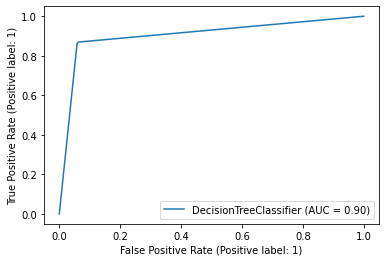

In [26]:
sklearn.metrics.plot_roc_curve(dtree, X_test, Y_test)  

## [6 points] Logistic Regression

Go through the documentation [here](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html) to understand how to use sklearn's logistic regression model.

[1 points] (a) Train a logistic regression model on the training dataset. Please specify the `penalty` parameter here as `None`. This implies that we are training the model without any regularisation. [It is alright if the final model does not converge]

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none', random_state=42)
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(penalty='none', random_state=42)

[2 points] (b) For this part, make predictions on the test data using the trained model, and compute the classification Accuracy, AUC score and plot the ROC curves.

Helpful resources can be found here - 
1. [sklearn.linear_model.LogisticRegression.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
2. [sklearn.metrics.plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)

Note down the observations. How is the performance compared to Decision Trees?

In [31]:
pred = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

train_preds = model.predict_proba(X_train)
test_preds = model.predict_proba(X_test)

train_score = roc_auc_score(Y_train, train_preds[:,1])
test_score = roc_auc_score(Y_test, test_preds[:,1])

print(classification_report(Y_test,pred))
print(train_score)
print(test_score)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       531
           1       0.92      0.89      0.91       390

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921

0.9653250245741288
0.9644212661161814


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


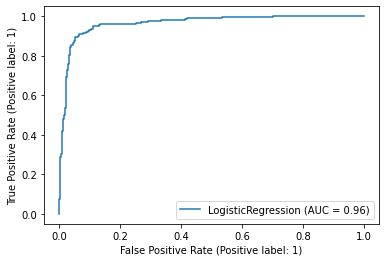

In [32]:
sklearn.metrics.plot_roc_curve(model, X_test, Y_test) 

Accuracy and precision were higher with logistic regression

[3 points] (c) Now, repeat the first two parts, using the l1 (Lasso) penalty with logistic regression to see which coefficients drop out.

Use the `penalty` parameter mentioned in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to use the Lasso penalty. Note that you would also have to set the solver parameter to `liblinear`, since that is the only one which is compatible with l1 regularisation.



To compare the model in the previous part with the regularised model, also plot the coefficients of the models. To access the values of the coefficients, use the `coef_` parameter of the model. Note down your observations on comparing the coefficients.



In [35]:
model1 = LogisticRegression(penalty='l2', random_state=42)
model1.fit(X_train,Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

## [5 points] Comparing calibration of Logistic Regression and Decision Trees


For this part, compare the calibration of the logistic regression classifier with Lasso regularisation against the Decision Tree Classifier. Use the sample code available [here](https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#calibration-curves) to understand how to plot calibration plots.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


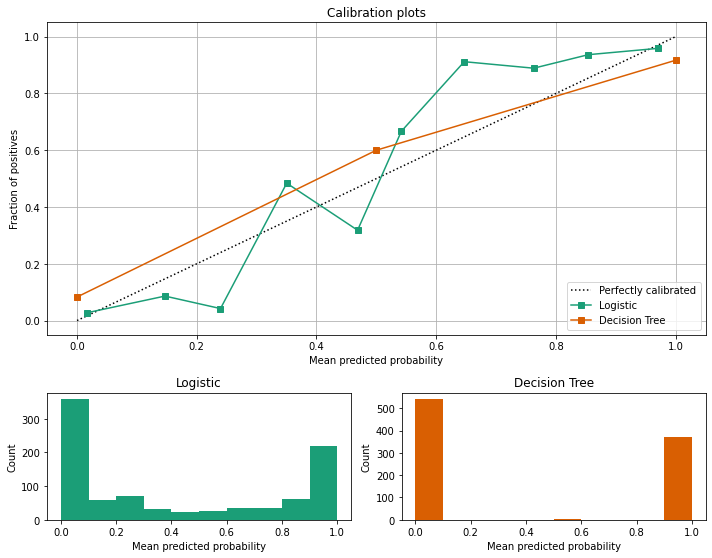

In [45]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

lr = LogisticRegression(C=1.0)
gnb = DecisionTreeClassifier()

clf_list = [
    (lr, "Logistic"),
    (gnb, "Decision Tree"),
]
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, Y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        Y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()


# Problem 2: LDA and QDA [20 Points]
##(TA: Usman)

Consider two classes in $R^2$ space; $C_1$ and $C_2$. Let the conditional distribution of our observation $x=[x_1 \ \  x_2]^T$ given class is as follows.

$$f(x|C_1)=\mathcal{N}(\mu_1,\Sigma_1)$$
$$f(x|C_2)=\mathcal{N}(\mu_2,\Sigma_2)$$

Throughout this question, take $$\mu_1=[-1 \ \ \  1]^T$$ and $$\mu_2=[1 \ \ -1]^T$$ and assume $P(C_1)=P(C_2)=\frac{1}{2}$

**(a)** For this part, let $\Sigma_1=\Sigma_2=I_{2\times2}$ where $I_{2\times2}$ is the identity matrix. Show that the maximum aposteriori decision rule is $$||x-\mu_1||^2<||x-\mu_2||^2$$ and obtain the decision boundary purely in terms of $x_1$ and $x_2$ and simplify as much as possible. Is this LDA? Justify your Answer.

**(b)** Now let $\Sigma_1=5 I_{2\times2}$ and let $\Sigma_2=2 I_{2\times2}$ Obtain the maximum aposteriori decision boundary in terms of $x_1$ and $x_2$. and simplify as much as possible. Is this LDA or QDA? Justify your Answer.


**Note:** The pdf of a multivariate guassian random distribution in $R^k$ with mean vector $\mu$ and covariance matrix $\Sigma$ is given by 
$$\frac{1}{\sqrt{(2\pi)^k|\Sigma|}}exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu))$$ where $|\Sigma|$ denotes the determinant of the matrix $\Sigma$

Also, $(x-\mu)^T(x-\mu)=||(x-\mu)||^2$. Lastly, the norm squared term of any vector can be calculated by summing its squared elements 

https://drive.google.com/file/d/1KaquKB-6L5KG-fbVY_Kv50AUbBih-c-S/view?usp=sharing

# Problem 3 : Naive Bayes for Hate-Speech Classification [15 points]

## (TA : Syamantak)

In this problem, you will do text classification for Hate Speech.

Hate speech is a

*   deliberate attack
*   directed towards a specific group of people
*   motivated by aspects of the group’s identity

The dataset you will be using is collected from Twitter online. Each example is labeled as 1 (hate speech) or 0 (non-hate speech). You can download the data from [here](https://drive.google.com/file/d/1_vslXLEjLDKt0LZo_h8mUYzZBxEBuos2/view?usp=sharing).

## Data pre-processing [3 points]

Since it is not possible to deal directly with raw text, we need a way to encode the text in an interpretable format.

We are going to extract Unigram features from the text for the purpose of this assignment.


As an example, consider the sentence - "I love Data Science". Let's say this sentence is a part of a dataset consisting of $V$ unique words. To encode this sentence,

1) We will first create an array of length $V$. Each index in this array will correspond to a particular unique word.

2) Initially, all elements in the array will be 0.

3) Now, for each word in the given sentence, we will increase the value at index of that word by 1. 

4) Therefore, in the array at each index of the word in the sentence, we will have its count in the sentence. All other values in the array will be zeros.


For example, let's say $V = 6$, such that the indices of the words are - "I" - 0, "love" - 3, "Data" - 5, "Science" - 2.

Then, the encoding of this sentence will be - [1,0,1,1,0,1].

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('max_colwidth', 400)

In [ ]:
# Read the data
data = pd.read_csv('data_problem1.csv')
data.head()

,text,label
0,"In order to help increase the booklets downloads , it would be great if all Stormfronters who had YouTube accounts , could display the following text in the description boxes of their uploaded YouTube videos .",0
1,Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engineered INTENTIONAL destruction of Western civilization .,1
2,Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engineered INTENTIONAL destruction of Western civilization .,1
3,"Booklet updated on Dec. 9th , 2013 .",0
4,Thank you in advance. : ) Download the youtube `` description box '' info text file below @ http://www.mediafire.com/download/gxv2b33v37la6pz/Booklet % 20Description % 20Box % 20Info.txt,0


In [ ]:
#@title Code to extract Unigram features

from nltk.tokenize import regexp_tokenize
import numpy as np

# Here is a default pattern for tokenization, you can substitue it with yours
default_pattern =  r"""(?x)                  
                        (?:[A-Z]\.)+          
                        |\$?\d+(?:\.\d+)?%?    
                        |\w+(?:[-']\w+)*      
                        |\.\.\.               
                        |(?:[.,;"'?():-_`])    
                    """

def tokenize(text, pattern = default_pattern):
    """Tokenize senten with specific pattern
    
    Arguments:
        text {str} -- sentence to be tokenized, such as "I love NLP"
    
    Keyword Arguments:
        pattern {str} -- reg-expression pattern for tokenizer (default: {default_pattern})
    
    Returns:
        list -- list of tokenized words, such as ['I', 'love', 'nlp']
    """
    text = text.lower()
    return regexp_tokenize(text, pattern)

class UnigramFeature(object):
    """Example code for unigram feature extraction
    """
    def __init__(self):
        self.unigram = {}
        self.index2word_dict = {}
        
    def fit(self, text_set: list):
        """Fit a feature extractor based on given data 
        
        Arguments:
            text_set {list} -- list of tokenized sentences and words are lowercased, such as [["I", "love", "nlp"], ["I", "like", "python"]]
        """
        index = 0
        for i in range(0, len(text_set)):
            for j in range(0, len(text_set[i])):
                if text_set[i][j].lower() not in self.unigram:
                    self.unigram[text_set[i][j].lower()] = index
                    self.index2word_dict[index] = text_set[i][j].lower()
                    index += 1
                else:
                    continue
                    
    def transform(self, text: list):
        """Transform a given sentence into vectors based on the extractor you got from self.fit()
        
        Arguments:
            text {list} -- a tokenized sentence (list of words), such as ["I", "love", "nlp"]
        
        Returns:
            array -- an unigram feature array, such as array([1,1,1,0,0,0])
        """
        feature = np.zeros(len(self.unigram))
        for i in range(0, len(text)):
            if text[i].lower() in self.unigram:
                feature[self.unigram[text[i].lower()]] += 1
        
        return feature
    
    def transform_list(self, text_set: list):
        """Transform a list of tokenized sentences into vectors based on the extractor you got from self.fit()
        
        Arguments:
            text_set {list} --a list of tokenized sentences, such as [["I", "love", "nlp"], ["I", "like", "python"]]
        
        Returns:
            array -- unigram feature arraies, such as array([[1,1,1,0,0], [1,0,0,1,1]])
        """
        features = []
        for i in range(0, len(text_set)):
            features.append(self.transform(text_set[i]))
        
        return np.array(features)

    def index2word(self, index):
        """ Returns the word at a given index in the feature vector"""
        if(index not in self.index2word_dict):
          return None
        return self.index2word_dict[index]

    def word2index(self, word):
        """ Returns the index corresponding to a given word in the feature vector"""
        if(word not in self.unigram):
          return None
        return self.unigram[word]

In [ ]:
# Create feature extractor
feat_extractor = UnigramFeature()

# Tokenize text into tokens
tokenized_text = []
for i in range(0, len(data['text'])):
    tokenized_text.append(tokenize(data['text'][i]))

feat_extractor.fit(tokenized_text)

# Tokenize data and separate feature and predictor variables
X = feat_extractor.transform_list(tokenized_text)
Y = data['label']

print("Shape of features ", X.shape)
print("Shape of target ", Y.shape)

Shape of features  (1913, 6012)
Shape of target  (1913,)


In [ ]:
# Code Sample on how to switch between indices and words
print("Moving from index to word : ", feat_extractor.index2word(10))
print("Moving from word to index : ", feat_extractor.word2index("would"))

Moving from index to word :  would
Moving from word to index :  10


In [ ]:
# Let's further split the data into training and validation
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_valid.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of Y_test : ", Y_valid.shape)

Shape of X_train :  (1530, 6012)
Shape of X_test :  (383, 6012)
Shape of Y_train :  (1530,)
Shape of Y_test :  (383,)


a) How many unique words exist in the entire dataset? [1 point] 

6012

b) How many sentences are present in the entire dataset? [1 point]

1913

c) How many features are present for each data point in the dataset? [1 point]

6012

## Model Training and Analysis [12 points]



a) [6 points] Now, we will train a Naive Bayes model to classify the sentences in the as Hate speech (1) or Non Hate-Speech (0) on the training set, and report our performance (accuracy) on both the training and validation sets.

We are going to use sklearn's [MutinomialNB classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) for our purpose.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, Y_train)

score = clf.score(X_valid, Y_valid)
print(score)

0.7180156657963447


b) [6 points] List the 10 words (across the **entire** dataset) that, under your model, have the highest ratio of $ \frac{P(w|1)}{P(w|0)}$ (the
most distinctly hatespeech words). List the 10 words (across the **entire** dataset) with the lowest ratio. What trends do you see?

[Hint : To switch between feature indices and words, see the code sample in the data pre-processing section. To get the values of $P(w|0)$ and $P(w|1)$, use the [predict_proba](https://github.com/scikit-learn/scikit-learn/blob/582fa30a3/sklearn/naive_bayes.py#L109) function for the model.]

In [ ]:
from numpy import identity

identity_matrix = identity(6012)

prediction = clf.predict_proba(identity_matrix)

prob_list = []
for index, pred in enumerate(prediction):
  prob_list.append((feat_extractor.index2word(index), pred[1] / pred[0]))

new_list = sorted(prob_list, key=lambda x: -x[1])
print([item[0] for item in new_list[:10]])
print([item[0] for item in new_list[-10:]])

['non', 'mud', 'ape', 'non-white', 'asian', 'jews', 'kill', 'dumb', 'liberal', 'dirty']
['sports', 'irishcentral', 'facebook', 'spirit', '10.00', 'com', 'students', 'thanks', 'sf', 'check']



#Problem 4: Bayesian Belief Networks [15 points]
## (TA : Syamantak)

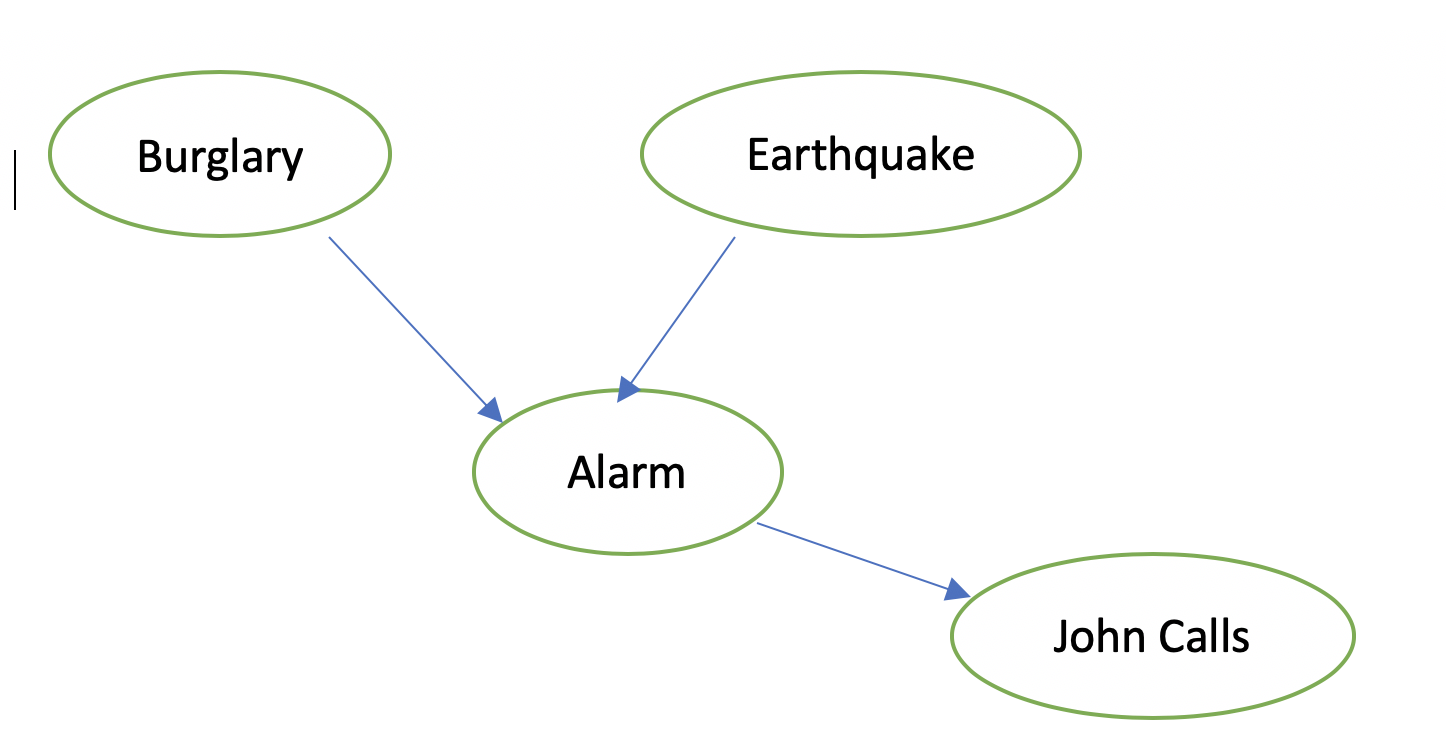

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(Burglary = 1) = .001   
P(Earthquake = 1) = 0.002


P(Alarm = 1 | Burglary = 0, Earthquake = 0) = .001  
P(Alarm = 1 | Burglary = 0, Earthquake = 1) = .29  
P(Alarm = 1 | Burglary = 1, Earthquake = 0) = .94  
P(Alarm = 1 | Burglary = 1, Earthquake = 1) = .95

P(John Calls = 1 | Alarm = 1) = .9  
P(John Calls = 1 | Alarm = 0) = .05

For the given Bayesian network, Compute the following probabilities : 


**(a) (4 pts)** Find the probability that  John Calls = 1 

**(b) (4 pts)** Given that there is no Earthquake, what is the probability that Alarm rings(Alarm = 1)

**(c) (7 pts)** Given that Alarm rings(Alarm = 1), what is the probability that the Burglary happened (Burglary = 1)

## Answer : 

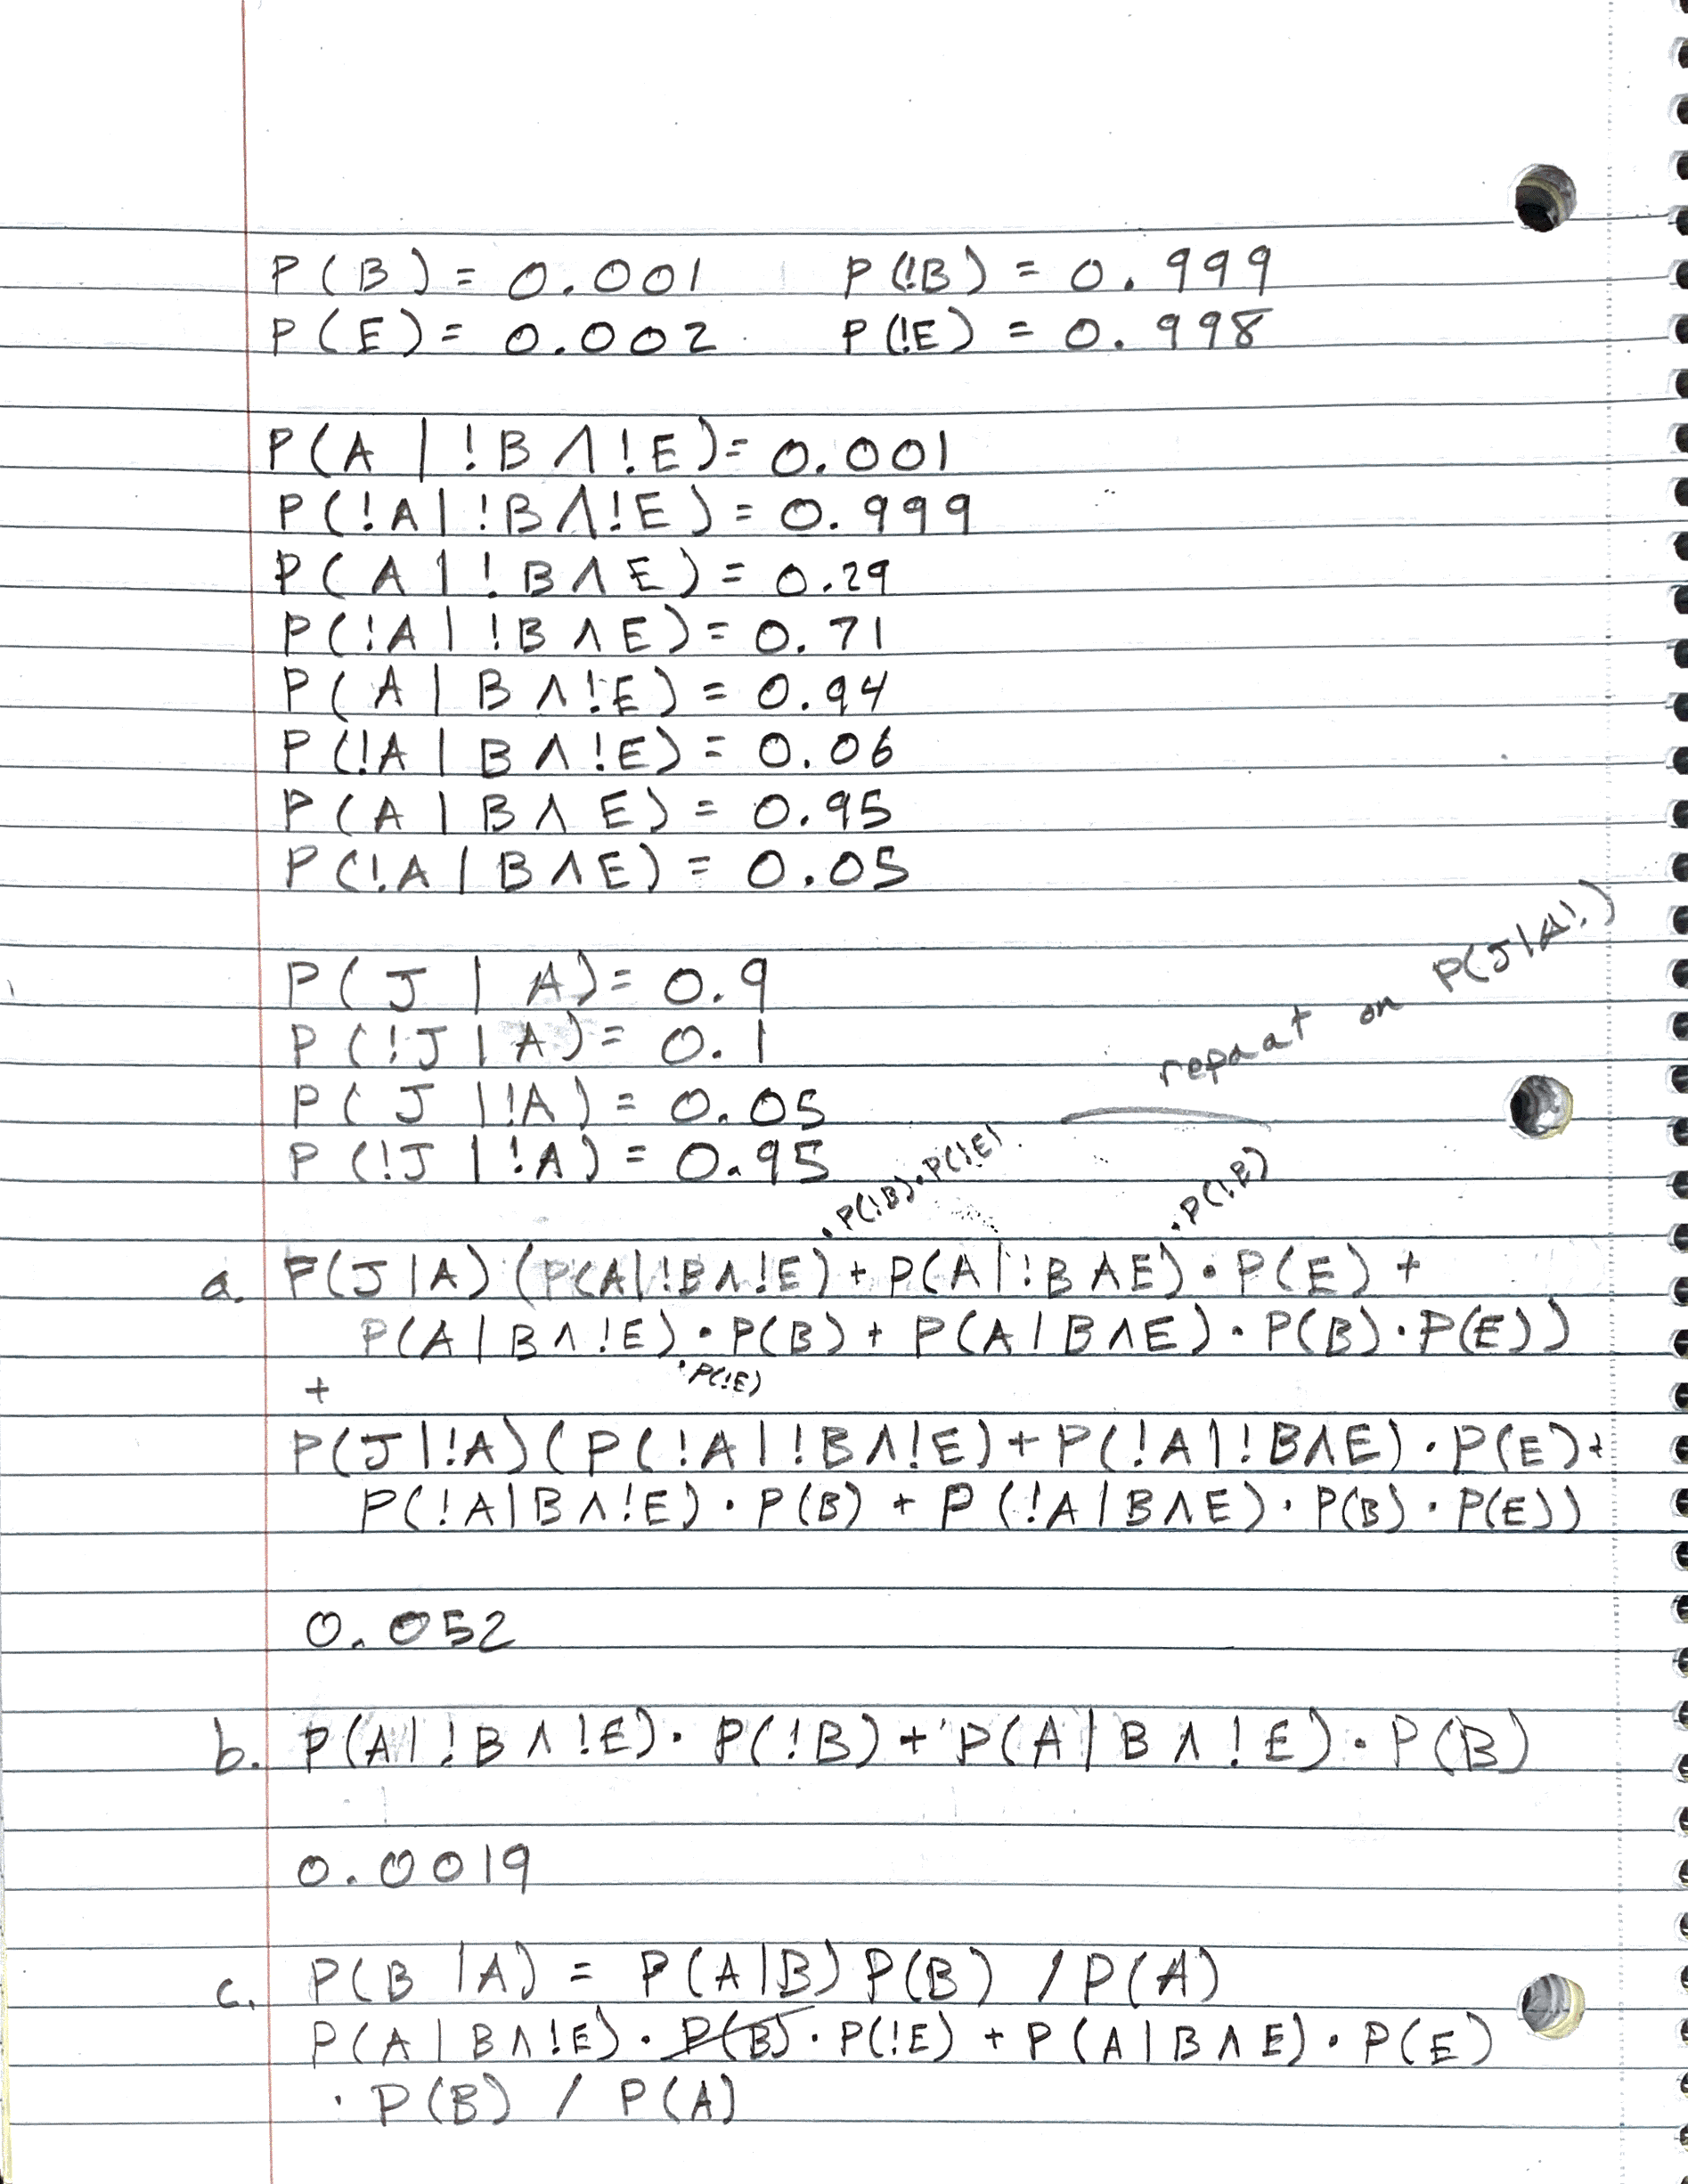

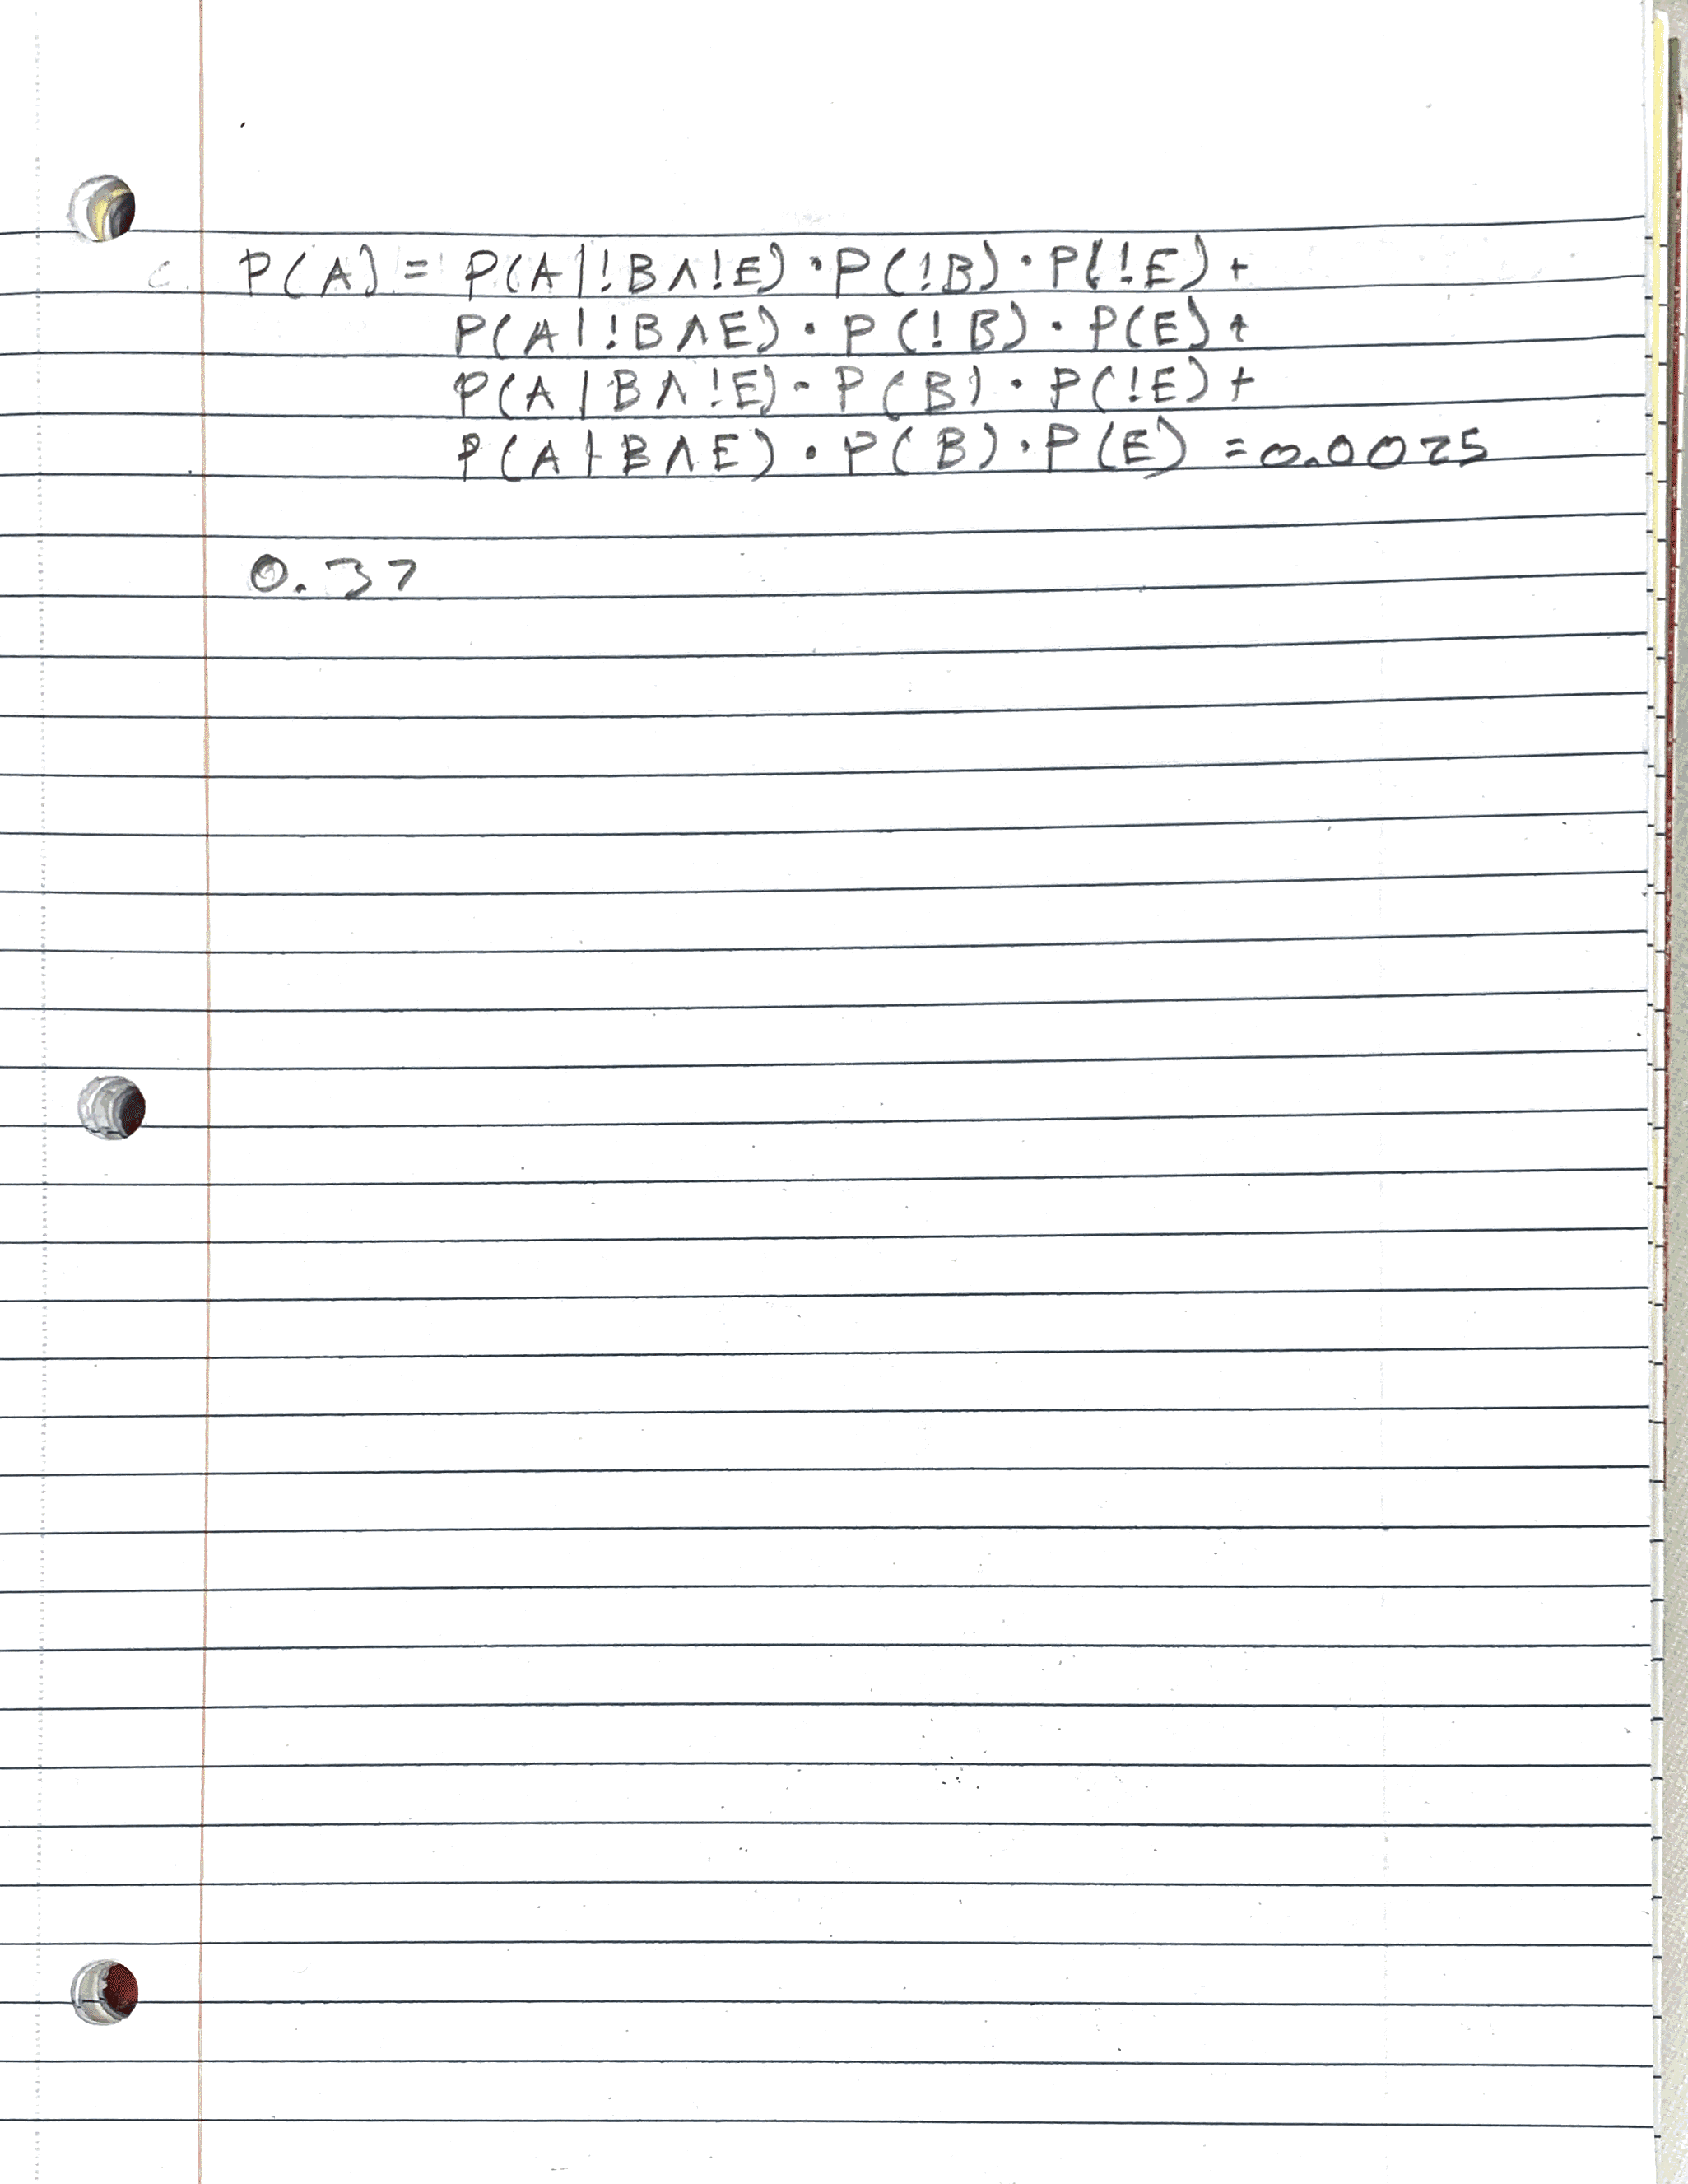

# Problem 5 : Comparison of different ensemble methods for classification [20 pts]

## (TA : Syamantak)

We will use the dataset from the kaggle competition [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit). We will work on a smaller version of this dataset. The dataset is available [here](https://drive.google.com/file/d/1mXFJX6OnGPv8dFj_zijMOmaOM37djx5X/view?usp=sharing). 
We will predict the probability that somebody will experience financial distress in the next two years. The dataset has already been split into train and test sets for you.

In [ ]:
data = pd.read_csv('data_problem2.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.571373,66,0,0.430620,9274.0,10,0,1,0,0.0
1,0,0.233999,56,0,0.257380,5656.0,12,0,0,0,0.0
2,0,0.299270,33,0,0.114575,4747.0,8,0,0,0,3.0
3,0,0.032165,41,0,0.308326,8490.0,8,0,1,0,0.0
4,0,0.050591,36,0,0.862627,3333.0,8,0,2,0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (3350, 10) (3350,)
test (1650, 10) (1650,)


In this question, we will compare performance of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) Classifiers.

Part a) **2.5pts** Use a Decision Tree Classifier with random_state = 10 for the classification problem. Report the accuracy_score and roc_auc_score on the test data for the classifier.

Part b) **2.5pts** Create an ensemble of 20 classifiers (i.e n_estimators = 20) with random_state = 10 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifier as Decision Tree Classifier from part a). Report accuracy_score and roc_auc_score on the test data for the Bagging classifiers. 

Part c) **5pts** Use the training data and build a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model for the classification problem. Find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) (This can take a while, so don't worry). Report the optimal parameters obtained by GridSearch. Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data using the model fit with best parameters. (5pts)

Part d) **5pts** Use [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data. 

Part e) **5pts** Compare the performance of decision tree from part a) with the ensemble methods, Briefly explain which of the three ensemble method performed better and why?

In [ ]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_roc_curve
from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeClassifier(random_state=10)
decision_tree.fit(X_train, y_train)
print(decision_tree.score(X_test, y_test))
pred = decision_tree.predict(X_test)
print(roc_auc_score(y_test, pred))

bagging = BaggingClassifier(base_estimator=decision_tree)
bagging.fit(X_train, y_train)
print(bagging.score(X_test, y_test))
print(metrics.roc_auc_score(y_test, bagging.predict_proba(X_test)[:, 1]))

forest = RandomForestClassifier()
params = {
    "n_estimators" : [i for i in range(1, 10)],
    "max_features" : ["auto", "sqrt", "log2"],
    "criterion"    : ["gini", "entropy"]
}
gs = GridSearchCV(forest, params)
gs.fit(X_train, y_train)
print(gs.best_params_.values())

print(confusion_matrix(y_test, gs.predict(X_test)))
print(roc_auc_score(y_test, gs.predict_proba(X_test)[:, 1]))

0.8884848484848484
0.6193290844298246
0.9242424242424242
0.7593201754385965
dict_values(['gini', 'auto', 8])
[[1507   29]
 [  98   16]]
0.755773711622807


In [ ]:
adaboost = AdaBoostClassifier()
params = {
    "n_estimators" : [i for i in range(1, 10)],
    "learning_rate" : [i / 10 for i in range(1, 10)]
}
gs = GridSearchCV(adaboost, params)
gs.fit(X_train, y_train)
print(gs.best_params_.values())

print(metrics.confusion_matrix(y_test, gs.predict(X_test)))
print(metrics.roc_auc_score(y_test, gs.predict_proba(X_test)[:, 1]))

dict_values([0.5, 7])
[[1526   10]
 [ 108    6]]
0.8340214957967838


The AdaBoost classifier worked best because it reduces both variance and bias while bagging only reduces the variance